In [ ]:
pip install spotipy

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 

In [ ]:
client_id = 'fe85d07e633d45bdad9c3c3191e60b4d'
client_secret = '5b55d434b25543fb812bd614590deac8'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
def getTrackID(user, playlist_id):
    id = []
    play_list = sp.user_playlist(user, playlist_id)
    for item in play_list['tracks']['items']:
        track = item['track']
        id.append(track['id'])
    return id

id = getTrackID('1ghpou4r8snsvrkafc2wmfc8w', '5diJM46F2yk4XfrOiELfE3')

In [ ]:
print(len(id))
print(id)

100
['2JzZzZUQj3Qff7wapcbKjc', '7yq4Qj7cqayVTp3FF9CWbm', '3CRDbSIZ4r5MsZ0YwxuEkn', '0TDLuuLlV54CkRRUOahJb4', '0nrRP2bk19rLc0orkWPQk2', '0ct6r3EGTcMLPtrXHDvVjc', '3vZM2544ETmOCCHuBPZRzm', '4lhqb6JvbHId48OUJGwymk', '2P4OICZRVAQcYAV2JReRfj', '31qgVdvSqTQ7unwQQngycB', '7w87IxuO7BDcJ3YUqCyMTT', '1Mf27cnAF1Q6Ko83XTM5d1', '62yJjFtgkhUrXktIoSjgP2', '2jiPHbFX5XM8TjaTfYJ0eo', '1K3LRUEcUz5FMtPYyg0F45', '0qOnSQQF0yzuPWsXrQ9paz', '7pYfyrMNPn3wtoCyqcTVoI', '4OSBTYWVwsQhGLF9NHvIbR', '3bNv3VuUOKgrf5hu3YcuRo', '1Yk0cQdMLx5RzzFTYwmuld', '3e9HZxeyfWwjeyPAMmWSSQ', '6lV2MSQmRIkycDScNtrBXO', '4Ub8UsjWuewQrPhuepfVpd', '2Fxmhks0bxGSBdJ92vM42m', '47Slg6LuqLaX0VodpSCvPt', '3w3y8KPTfNeOKPiqUTakBh', '6qn9YLKt13AGvpq9jfO8py', '0azC730Exh71aQlOt9Zj3y', '1rfofaqEpACxVEHIZBJe6W', '58q2HKrzhC3ozto2nDdN4z', '20I6sIOMTCkB6w7ryavxtO', '3MeL7vAsVbgSrGFd0HioaJ', '7BKLCZ1jbUBVqRi2FVlTVw', '6RUKPb4LETWmmr3iAEQktW', '61dCUoMCg28qEBzrW6htYM', '2Foc5Q5nqNiosCNqttzHof', '67awxiNHNyjMXhVgsHuIrs', '1zi7xx7UVEFkmKfv06H8x0', '6jdOi5

In [ ]:
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta data
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features from the data
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']

  track = [name, album, artist, release_date, length, popularity, danceability, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
  return track

In [ ]:
# loop over track ids 
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)

# create dataset
df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
df.to_csv("spotify.csv", sep = ',')

In [ ]:
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),Wiz Khalifa,2015-01-01,229525,80,0.689,0.36900,0.689,0.481,0.000001,0.0649,-7.503,0.0815,80.025,4
1,Riptide,Dream Your Life Away,Vance Joy,2014-09-08,204280,78,0.484,0.43100,0.484,0.731,0.000000,0.1510,-6.694,0.0379,101.654,4
2,Stressed Out,Blurryface,Twenty One Pilots,2015-05-15,202333,82,0.734,0.04620,0.734,0.637,0.000023,0.0602,-5.677,0.1410,169.977,4
3,Titanium (feat. Sia),Nothing but the Beat (Ultimate Edition),David Guetta,2012-12-07,245040,77,0.604,0.06790,0.604,0.787,0.150000,0.1270,-3.674,0.1030,126.062,4
4,Wake Me Up,True,Avicii,2013-01-01,247426,83,0.532,0.00380,0.532,0.783,0.001200,0.1610,-5.697,0.0523,124.080,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Dynamite,The Rokstarr Hits Collection,Taio Cruz,2010-01-01,202613,77,0.751,0.00379,0.751,0.783,0.000000,0.0360,-3.724,0.0859,119.975,4
96,Shake It Off,1989 (Deluxe),Taylor Swift,2014-01-01,219200,76,0.647,0.06470,0.647,0.800,0.000000,0.3340,-5.384,0.1650,160.078,4
97,Ho Hey,The Lumineers (Deluxe Edition),The Lumineers,2012-01-01,163133,73,0.682,0.76500,0.682,0.471,0.000000,0.0908,-9.182,0.0301,79.907,4
98,The Hills,Beauty Behind The Madness,The Weeknd,2015-08-28,242253,83,0.585,0.06710,0.585,0.564,0.000000,0.1350,-7.063,0.0515,113.003,4


In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d') 

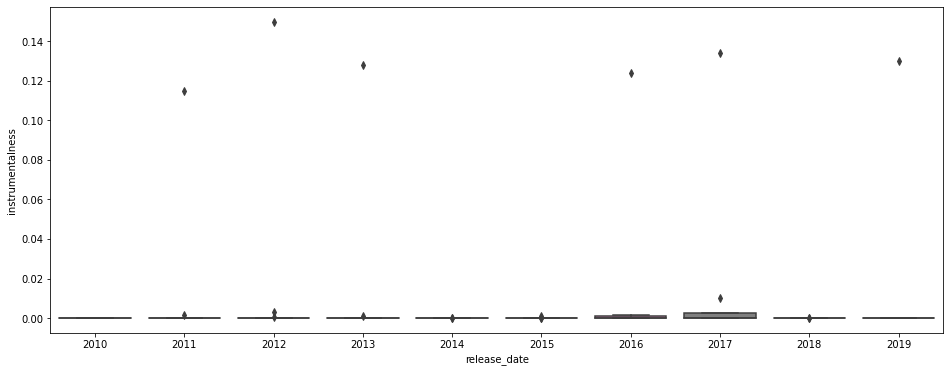

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
sns.boxplot(x=df.release_date.dt.year,
            y=df.instrumentalness)

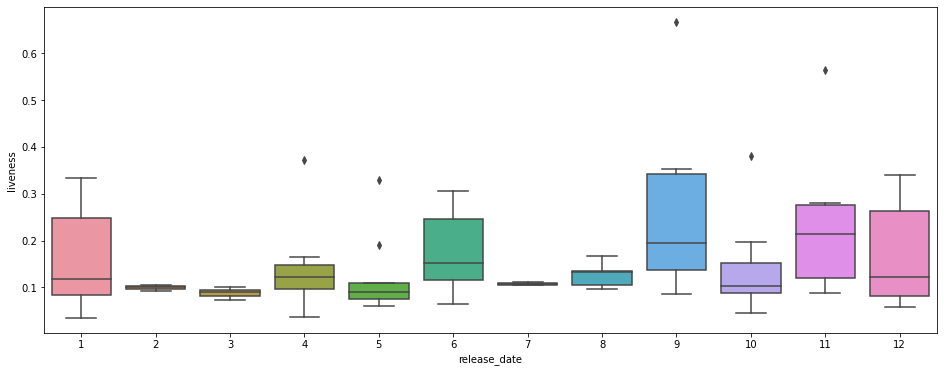

In [ ]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df.release_date.dt.month,
            y=df.liveness)

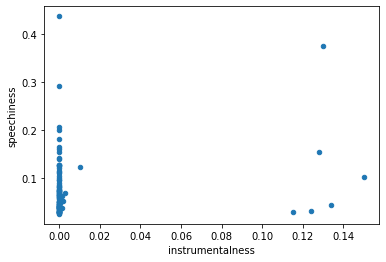

In [ ]:
df.plot(kind='scatter', x='instrumentalness', y='speechiness')

In [ ]:
df1=df['artist'].value_counts()

In [ ]:
df2 = pd.DataFrame({'artist':df1.index, 'count':df1.values})

In [ ]:
df2

,artist,count
0,Avicii,4
1,Various Artists,3
2,Macklemore & Ryan Lewis,3
3,Adele,3
4,Imagine Dragons,3
...,...,...
73,P!nk,1
74,Twenty One Pilots,1
75,B.o.B,1
76,Vance Joy,1


In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot('artist','count',data=df2,palette='vlag')
chart.set_xticklabels(chart.get_xticklabels())
#chart.set(xlabels='Artist',ylabel='Number of songs')

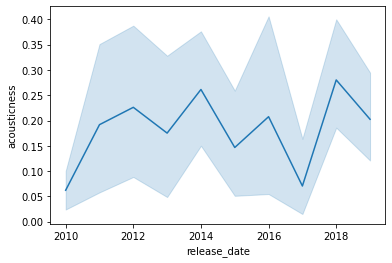

In [ ]:
fig,ax=plt.subplots(figsize=(6,4))
sns.lineplot(x=df.release_date.dt.year,y=df.acousticness,data=df)

TypeError: ignored

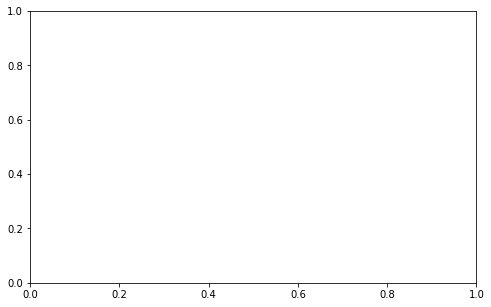

In [ ]:
correlated_data = df[['popularity', 'danceability', 'acousticness', 'danceability', 'energy']].corr()
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(correlated_data)